## Rusya-Ukrayna Savaşı


Rusya-Ukrayna Savaşı, Rusya, Beyaz Rusya ve Rus yanlısı güçler ile Ukrayna arasında sürmekte olan bir savaştır. 
Ukrayna Devlet Başkanı Viktor Yanukoviç'in Kırım'daki gerginlik nedeniyle Rusya'dan bölgeye asker göndermesini istemesinin
ardından 2014 yılında başlayan ve Şubat 2022'de büyüyen askerî hareketliliktir. 
Bu savaşa Rusya'nın Kırım'ı ilhakı (2014), Donbass Savaşı (2014-günümüz), siber savaş ve siyasi gerilimler de dahildir.
24 Şubat 2022' de Rusya lideri Putin Ukrayna'yı istilaya başladıklarını televizyondan duyurdu. 
2021'de diplomatik krizin ardından Ukrayna sınırlarına yakın bölgelere askeri yığınak yapan Rusya,
24 Şubat 2022'de geniş çaplı bir şekilde Ukrayna'yı istila etmeye başladı.

BM'ye göre, savaşta toplam insan zayiatı 13.100-13.300 kişidir. Bu sayı 3.375 sivil ölümü, yaklaşık 4.150 Ukrayna askeri ölümü ve yaklaşık 5.700 Rus yanlısı savaşçıyı içeriyor. Yaklaşık 1,8 milyon kişi ülke içinde yerinden edilmiş kişiler haline geldi ve Ukrayna topraklarının %7'sinden fazlasını işgal etti.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

from plotly.offline import init_notebook_mode
import datetime as dt
import plotly.graph_objects as go
init_notebook_mode(connected=True)

import plotly.io as pio
pio.templates.default = 'plotly_dark'

pd.options.mode.chained_assignment = None 
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [2]:
df1=pd.read_csv("russia_losses_equipment.csv")    #ekipman kaybı
df2=pd.read_csv("russia_losses_personnel.csv")    #insan kaybı

# Ekipman kaybını inceleyim

In [3]:
df1.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
291,2022-12-13,293,281,264,2966,5930,1931,404,NaN,NaN,1617,16,211,170.0,NaN,NaN,4549.0,592.0
292,2022-12-14,294,281,264,2970,5937,1931,404,NaN,NaN,1617,16,211,171.0,NaN,NaN,4562.0,592.0
293,2022-12-15,295,281,264,2975,5946,1943,406,NaN,NaN,1644,16,211,172.0,NaN,NaN,4563.0,592.0
294,2022-12-16,296,281,264,2980,5952,1946,410,NaN,NaN,1648,16,211,172.0,NaN,NaN,4563.0,592.0
295,2022-12-17,297,281,264,2985,5958,1947,410,NaN,NaN,1648,16,211,174.0,NaN,NaN,4577.0,653.0


In [5]:
df1.shape

(296, 18)

In [6]:
df1.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,65.000000,65.000000,296.000000,296.000000,296.000000,277.000000,36.000000,231.000000,231.000000
mean,149.500000,212.658784,188.814189,1713.956081,3802.371622,975.084459,249.077703,1047.507692,69.323077,741.435811,12.648649,124.459459,88.960289,3.944444,3260.021645,248.502165
std,85.592056,62.781530,54.176572,806.125781,1461.683076,563.294820,107.397870,466.162060,7.545917,495.303984,4.211147,57.943500,49.999658,0.333333,811.395960,144.765173
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000
25%,75.750000,199.000000,158.000000,1163.750000,2797.000000,517.500000,185.000000,600.000000,60.000000,379.250000,12.000000,87.000000,43.000000,4.000000,2582.000000,139.000000
50%,149.500000,221.000000,188.000000,1706.000000,3924.500000,863.500000,252.000000,1178.000000,73.000000,713.500000,15.000000,113.000000,82.000000,4.000000,3160.000000,196.000000
75%,223.250000,266.000000,229.000000,2426.750000,5023.000000,1408.750000,340.250000,1437.000000,76.000000,1029.000000,15.000000,177.000000,136.000000,4.000000,4005.500000,329.000000
max,297.000000,281.000000,264.000000,2985.000000,5958.000000,1947.000000,410.000000,1701.000000,76.000000,1648.000000,16.000000,211.000000,174.000000,4.000000,4577.000000,653.000000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       296 non-null    object 
 1   day                        296 non-null    int64  
 2   aircraft                   296 non-null    int64  
 3   helicopter                 296 non-null    int64  
 4   tank                       296 non-null    int64  
 5   APC                        296 non-null    int64  
 6   field artillery            296 non-null    int64  
 7   MRL                        296 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      296 non-null    int64  
 11  naval ship                 296 non-null    int64  
 12  anti-aircraft warfare      296 non-null    int64  
 13  special equipment          277 non-null    float64

In [8]:
df1.isnull().sum()   #boş verilerim var

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                231
fuel tank                    231
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           260
greatest losses direction    101
vehicles and fuel tanks       65
cruise missiles               65
dtype: int64

In [9]:
df1.drop('mobile SRBM system',axis=1,inplace=True)
df1.drop('military auto',axis=1,inplace=True)
df1.drop('fuel tank',axis=1,inplace=True)
df1.drop('greatest losses direction',axis=1,inplace=True)


#Buradaki sütunların çoğunluğu boş olduğu için sütunları sildim

In [10]:
df1.isnull().sum()

date                        0
day                         0
aircraft                    0
helicopter                  0
tank                        0
APC                         0
field artillery             0
MRL                         0
drone                       0
naval ship                  0
anti-aircraft warfare       0
special equipment          19
vehicles and fuel tanks    65
cruise missiles            65
dtype: int64

In [11]:
df1["special equipment"].unique()

array([ nan,  10.,  11.,  12.,  13.,  15.,  16.,  18.,  19.,  21.,  22.,
        24.,  25.,  26.,  27.,  28.,  31.,  32.,  38.,  39.,  41.,  42.,
        43.,  44.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  55.,  59.,
        60.,  61.,  64.,  65.,  66.,  67.,  68.,  70.,  72.,  73.,  75.,
        77.,  78.,  80.,  82.,  83.,  85.,  86.,  87.,  89.,  90.,  91.,
        92.,  93.,  94.,  97.,  99., 101., 103., 104., 105., 106., 107.,
       109., 110., 114., 116., 117., 120., 121., 122., 125., 126., 130.,
       131., 132., 134., 135., 136., 140., 142., 143., 144., 146., 147.,
       148., 149., 150., 151., 152., 154., 155., 157., 159., 160., 161.,
       163., 164., 167., 169., 170., 171., 172., 174.])

In [12]:
df1["special equipment"].fillna(0,inplace=True)
df1["vehicles and fuel tanks"].fillna(0,inplace=True)
df1["cruise missiles"].fillna(0,inplace=True)


#boş verileri "0" ile doldurdum

In [13]:
df1["special equipment"].unique()

array([  0.,  10.,  11.,  12.,  13.,  15.,  16.,  18.,  19.,  21.,  22.,
        24.,  25.,  26.,  27.,  28.,  31.,  32.,  38.,  39.,  41.,  42.,
        43.,  44.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  55.,  59.,
        60.,  61.,  64.,  65.,  66.,  67.,  68.,  70.,  72.,  73.,  75.,
        77.,  78.,  80.,  82.,  83.,  85.,  86.,  87.,  89.,  90.,  91.,
        92.,  93.,  94.,  97.,  99., 101., 103., 104., 105., 106., 107.,
       109., 110., 114., 116., 117., 120., 121., 122., 125., 126., 130.,
       131., 132., 134., 135., 136., 140., 142., 143., 144., 146., 147.,
       148., 149., 150., 151., 152., 154., 155., 157., 159., 160., 161.,
       163., 164., 167., 169., 170., 171., 172., 174.])

In [14]:
df1.isnull().sum()   #hiç boş verim kalmadı

date                       0
day                        0
aircraft                   0
helicopter                 0
tank                       0
APC                        0
field artillery            0
MRL                        0
drone                      0
naval ship                 0
anti-aircraft warfare      0
special equipment          0
vehicles and fuel tanks    0
cruise missiles            0
dtype: int64

# İnsan kaybını inceleyelim

In [15]:
df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0


In [16]:
df2.tail()

,date,day,personnel,personnel*,POW
291,2022-12-13,293,95260,about,NaN
292,2022-12-14,294,96000,about,NaN
293,2022-12-15,295,96590,about,NaN
294,2022-12-16,296,97270,about,NaN
295,2022-12-17,297,97690,about,NaN


In [17]:
df2.shape

(296, 5)

In [18]:
df2.describe()

,day,personnel,POW
count,296.000000,296.000000,62.000000
mean,149.500000,44215.695946,386.387097
std,85.592056,23897.079535,131.440363
min,2.000000,2800.000000,0.000000
25%,75.750000,25912.500000,389.000000
50%,149.500000,39120.000000,421.000000
75%,223.250000,60850.000000,474.500000
max,297.000000,97690.000000,496.000000


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        296 non-null    object 
 1   day         296 non-null    int64  
 2   personnel   296 non-null    int64  
 3   personnel*  296 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 11.7+ KB


In [20]:
df2.isnull().sum()    #POW çoğunluğu boş.

date            0
day             0
personnel       0
personnel*      0
POW           234
dtype: int64

In [21]:
df2.drop('POW',axis=1,inplace=True)

In [22]:
df2

,date,day,personnel,personnel*
0,2022-02-25,2,2800,about
1,2022-02-26,3,4300,about
2,2022-02-27,4,4500,about
3,2022-02-28,5,5300,about
4,2022-03-01,6,5710,about
...,...,...,...,...
291,2022-12-13,293,95260,about
292,2022-12-14,294,96000,about
293,2022-12-15,295,96590,about
294,2022-12-16,296,97270,about


In [23]:
df2.describe()

,day,personnel
count,296.000000,296.000000
mean,149.500000,44215.695946
std,85.592056,23897.079535
min,2.000000,2800.000000
25%,75.750000,25912.500000
50%,149.500000,39120.000000
75%,223.250000,60850.000000
max,297.000000,97690.000000


# Data Visualization

### İnsan Kaybı

<AxesSubplot:xlabel='personnel', ylabel='count'>

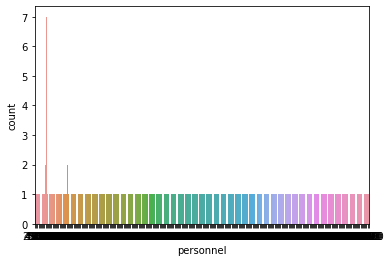

In [24]:
sns.countplot(df2['personnel'])


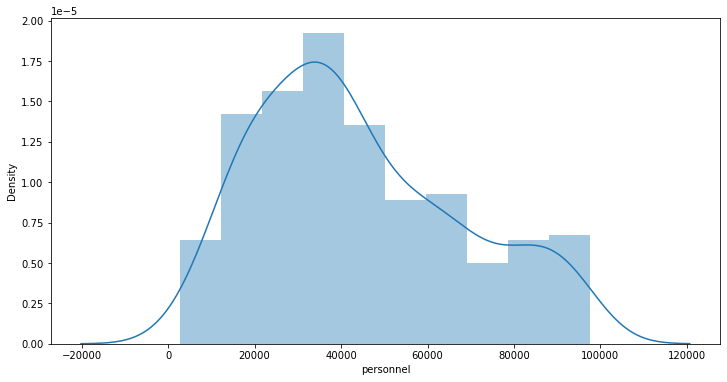

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(df2['personnel']);

In [26]:
#zamana bağlı insan kaybı

x= df2['date']
y= df2['personnel']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='lines+markers'))
fig.show()

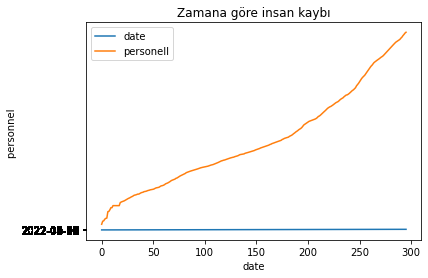

In [27]:
x= df2['date']
y= df2['personnel']

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, label="date")          
ax.plot(y, label="personell")
ax.set_xlabel("date")
ax.set_ylabel("personnel ")
ax.set_title("Zamana göre insan kaybı")
ax.legend(); 

### Ekipman Kaybı

In [28]:
#Zamana bağlı olarak ekipman kaybı


x =  df1['date']
y0 = df1['aircraft']
y1 = df1['helicopter']
y2 = df1['anti-aircraft warfare']
y3 = df1['drone']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='Anti-aircraft warfare'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Drone'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Air",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [29]:
x =  df1['date']
y0 = df1['tank']
y1 = df1['field artillery']
y2 = df1['APC']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0,
                    mode='lines+markers',
                    name='Tank'))
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',
                    name='Field artillery'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='APC'))

fig.update_layout(legend_orientation="h",
                  legend=dict(x=0, y=1, traceorder="normal"),
                  title="Weapons: Ground, Other",
                  xaxis_title="Date",
                  yaxis_title="Weapons ",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [30]:
def style():
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.update_layout(font_color = '#9EDEC6')
    fig.show()

In [31]:
df2['Count'] = df2['personnel'] - df2['personnel'].shift(1)
fig = px.histogram(df2, x='day', y='Count', title='Per Day Troop Losses', nbins=max(df2['day']))
style()

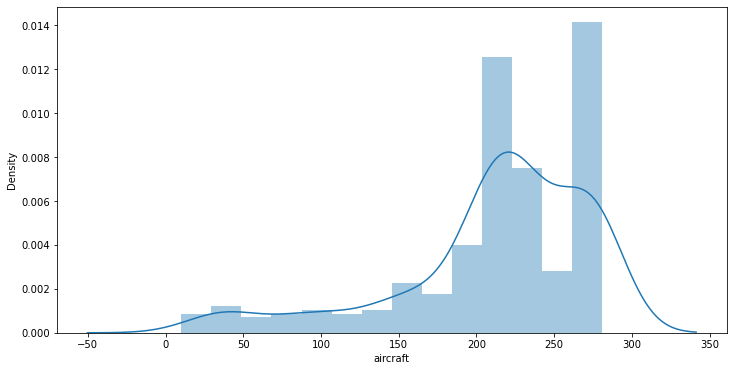

In [32]:
plt.figure(figsize=(12,6))
sns.distplot(df1['aircraft']);

In [33]:
fig=px.line(df1,x='date',
            y=['special equipment'],template='seaborn',title='Özel Ekipman Kaybı')
fig.update_traces(showlegend=False)
fig.show()

In [34]:
fig=px.line(df1,x='date',
            y=['MRL'],template='seaborn',title='Multiple Rocket Launcher')
fig.update_traces(showlegend=False)
fig.show()

In [35]:
fig=px.line(df1,x='day',
            y=['MRL'],template='plotly_dark', color_discrete_sequence=['crimson'], markers=True, title='Multiple Rocket Launcher')
fig.update_traces(showlegend=False)
fig.show()



In [36]:
dict_russia_losses_equipment_sum = df1.sum(axis=0)[1:]
fig = go.Figure(data=[go.Pie(labels=dict_russia_losses_equipment_sum.keys(), values=dict_russia_losses_equipment_sum.values, textinfo='label',
                             insidetextorientation='radial'
)])
fig.show()

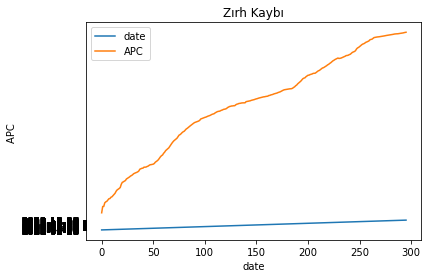

In [37]:
x= df1['date']
y= df1['APC']

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, label="date")          
ax.plot(y, label="APC")
ax.set_xlabel("date")
ax.set_ylabel("APC ")
ax.set_title("Zırh Kaybı")
ax.legend(); 

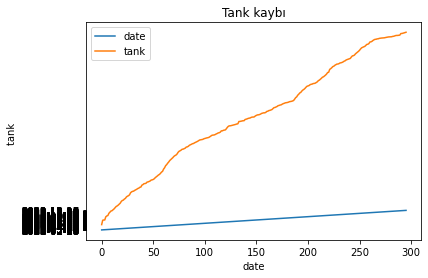

In [38]:
x= df1['date']
y= df1['tank']

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, label="date")          
ax.plot(y, label="tank")
ax.set_xlabel("date")
ax.set_ylabel("tank ")
ax.set_title("Tank kaybı")
ax.legend(); 

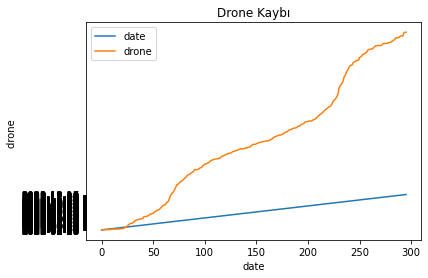

In [39]:
x= df1['date']
y= df1['drone']

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, label="date")          
ax.plot(y, label="drone")
ax.set_xlabel("date")
ax.set_ylabel("drone ")
ax.set_title("Drone Kaybı")
ax.legend(); 

In [43]:
import plotly.express as px
df1 = px.data.tips()
fig = px.scatter(df1, x="total_bill", y="tip", color="size",
                 title="tüm ekipmanlar")

fig.show()